In [1]:
import numpy as np
# from tensorflow.keras import optimizers,Sequential, layers, Model
import matplotlib.pyplot as plt
# import tensorflow as tf


from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import json

from matplotlib import colors

In [3]:
data_json_f = open(r'E:\tools\写论文\图表数据\水流层检测\loss\run-loss_all_dropout_water_2-tag-train_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_train = np.array(data_json)
loss_train_index = loss_train[:,1]
loss_train_loss = loss_train[:,2]

data_json_f = open(r'E:\tools\写论文\图表数据\水流层检测\loss\run-loss_all_dropout_water_2-tag-dev_loss.json','r')
data_json = json.load(data_json_f)
data_json_f.close()
loss_dev = np.array(data_json)
loss_dev_index = loss_dev[:,1]
loss_dev_loss = loss_dev[:,2]

In [4]:
loss_train_index.shape,loss_dev_index.shape

((1000,), (1000,))

In [25]:
loss_train_loss[-1]

31.198135375976562

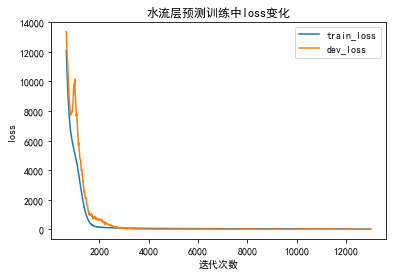

In [8]:
start = 40
start2 = 40
plt.title("水流层预测训练中loss变化")
plt.ylabel("loss")
plt.xlabel("迭代次数")
plt.plot(loss_train_index[start:],loss_train_loss[start:],label='train_loss')
plt.plot(loss_dev_index[start2:],loss_dev_loss[start2:],label='dev_loss')
plt.legend()
plt.savefig(r'E:\tools\写论文\图表数据\水流层检测\水流层预测训练中loss变化.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

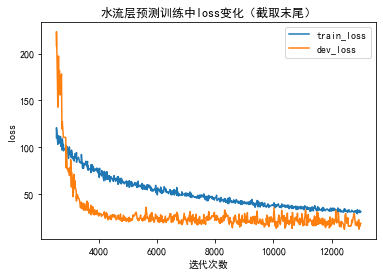

In [12]:
start = 200
start2 = 200
plt.title("水流层预测训练中loss变化（截取末尾）")
plt.ylabel("loss")
plt.xlabel("迭代次数")
plt.plot(loss_train_index[start:],loss_train_loss[start:],label='train_loss')
plt.plot(loss_dev_index[start2:],loss_dev_loss[start2:],label='dev_loss')
plt.legend()
plt.savefig(r'E:\tools\写论文\图表数据\水流层检测\水流层预测训练中loss变化（截取末尾）.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [14]:
water_rho = 1010.0
water_vp = 1500.0
water_vs = 0.0
# labels = np.zeros((2048,3),dtype=np.float32)
for num in range(8):
    left = np.random.randint(256, 640)
    right = np.random.randint(256, 640)
    width = np.random.randint(40, 200)
#     labels[num,0] = left
#     labels[num,1] = right
#     labels[num,2] = width
    depth_list = np.linspace(left,right,1024).astype(int)
    vp = np.ones((1024,1024),dtype=np.float32)*2000
#     vs = np.ones((1024,1024),dtype=np.float32)*1155
#     rho = np.ones((1024,1024),dtype=np.float32)*2074
    for i,depth in enumerate(depth_list):
        vp[depth:depth+width,i] = 1500.0
#         vs[depth:depth+width,i] = 0.0
#         rho[depth:depth+width,i] = 1010.0
    np.save(r'E:\tools\写论文\图表数据\水流层检测\model\model_'+str(num+1),vp)
    
#     vp[::2,::2].T.tofile(r'\\10.1.4.151\share\zzm\data\experiment3\model_512\m_'+str(num)+ '.vp')
#     vs[::2,::2].T.tofile(r'\\10.1.4.151\share\zzm\data\experiment3\model_512\m_'+str(num)+ '.vs')
#     rho[::2,::2].T.tofile(r'\\10.1.4.151\share\zzm\data\experiment3\model_512\m_'+str(num)+ '.rho')
# np.save(r'\\10.1.4.151\share\zzm\data\experiment3\model_512_label\labels',labels)


In [17]:
m1 = np.load(r'E:\tools\写论文\图表数据\水流层检测\model\model_'+str(1)+'.npy')
m2 = np.load(r'E:\tools\写论文\图表数据\水流层检测\model\model_'+str(2)+'.npy')
m3 = np.load(r'E:\tools\写论文\图表数据\水流层检测\model\model_'+str(3)+'.npy')
m4 = np.load(r'E:\tools\写论文\图表数据\水流层检测\model\model_'+str(4)+'.npy')

In [22]:
vpdatas = [m1,m2,m3,m4]

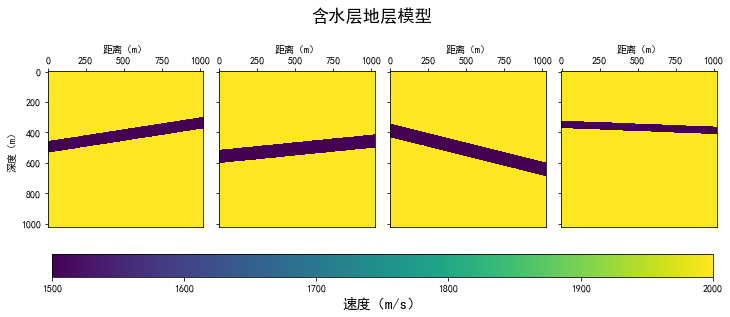

In [24]:
Nr = 1
Nc = 4

fig, axs = plt.subplots(Nr, Nc,figsize=(12, 8))
fig.suptitle('含水层地层模型',y=0.75,fontsize='xx-large')

images = []
# for i in range(Nr):
for j in range(Nc):
    # Generate data with a range that varies from one plot to the next.
    axs[j].xaxis.set_ticks_position('top')
    axs[j].set_xlabel('距离（m）')
    axs[j].set_ylabel('深度（m）')
#     axs[j].set_xticks([0,100,200])
#     axs[j].set_xticklabels([0,400,800])
#     axs[j].set_yticks([0,50,100,150,200,250])
#     axs[j].set_yticklabels([0,200,400,600,800,1000])
    axs[j].xaxis.set_label_position('top')
    images.append(axs[j].imshow(vpdatas[j]))
    axs[j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.28, 0.765, 0.04])#位置[左,y,右,高]
cbar  = fig.colorbar(images[0], ax=axs, cax=position, orientation='horizontal', fraction=.2)
cbar.set_label('速度（m/s）',fontsize='x-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(r'E:\tools\写论文\图表数据\水流层检测\含水层地层模型.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()

In [2]:
test_y = np.load(r'E:\tools\写论文\图表数据\水流层检测\datas\test_y.npy')
test_y_pred = np.load(r'E:\tools\写论文\图表数据\水流层检测\datas\test_y_pred.npy')

In [10]:
np.max(test_y_pred[:,2])

195.85376

In [11]:
np.mean(np.abs(test_y[:,2]-test_y_pred[:,2]))

2.7764244

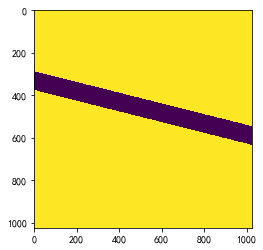

In [18]:
num = 0
left = int(test_y[num,0])
right = int(test_y[num,1])
width = int(test_y[num,2])
depth_list = np.linspace(left,right,1024).astype(int)
vp_1 = np.ones((1024,1024),dtype=np.float32)*2000
for i,depth in enumerate(depth_list):
    vp_1[depth:depth+width,i] = 1500.0
plt.imshow(vp_1)

num = 0
left = int(test_y_pred[num,0])
right = int(test_y_pred[num,1])
width = int(test_y_pred[num,2])
depth_list = np.linspace(left,right,1024).astype(int)
vp_2 = np.ones((1024,1024),dtype=np.float32)*2000
for i,depth in enumerate(depth_list):
    vp_2[depth:depth+width,i] = 1500.0
plt.imshow(vp_2)

num = 16
left = int(test_y[num,0])
right = int(test_y[num,1])
width = int(test_y[num,2])
depth_list = np.linspace(left,right,1024).astype(int)
vp_3 = np.ones((1024,1024),dtype=np.float32)*2000
for i,depth in enumerate(depth_list):
    vp_3[depth:depth+width,i] = 1500.0
plt.imshow(vp_3)

num = 16
left = int(test_y_pred[num,0])
right = int(test_y_pred[num,1])
width = int(test_y_pred[num,2])
depth_list = np.linspace(left,right,1024).astype(int)
vp_4 = np.ones((1024,1024),dtype=np.float32)*2000
for i,depth in enumerate(depth_list):
    vp_4[depth:depth+width,i] = 1500.0
plt.imshow(vp_4)

In [22]:
vpdatas = [vp_1,vp_2,vp_3,vp_4]

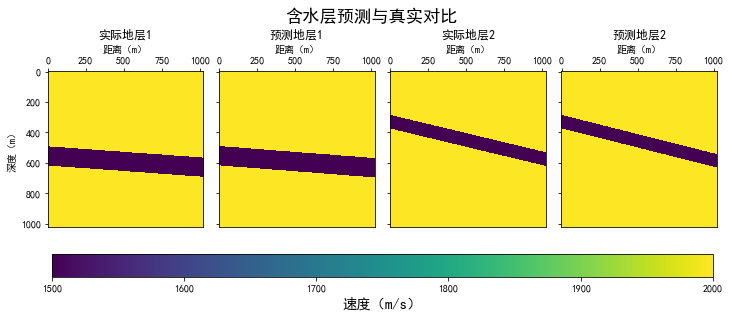

In [25]:
Nr = 1
Nc = 4

fig, axs = plt.subplots(Nr, Nc,figsize=(12, 8))
fig.suptitle('含水层预测与真实对比',y=0.75,fontsize='xx-large')

images = []
# for i in range(Nr):
for j in range(Nc):
    # Generate data with a range that varies from one plot to the next.
    if j==0 or j==2:
            axs[j].set_title('实际地层'+str(j//2 +1))
    if j==1 or j==3:
        axs[j].set_title('预测地层'+str(j//2 +1))
    axs[j].xaxis.set_ticks_position('top')
    axs[j].set_xlabel('距离（m）')
    axs[j].set_ylabel('深度（m）')
#     axs[j].set_xticks([0,100,200])
#     axs[j].set_xticklabels([0,400,800])
#     axs[j].set_yticks([0,50,100,150,200,250])
#     axs[j].set_yticklabels([0,200,400,600,800,1000])
    axs[j].xaxis.set_label_position('top')
    images.append(axs[j].imshow(vpdatas[j]))
    axs[j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
    
position=fig.add_axes([0.13, 0.28, 0.765, 0.04])#位置[左,y,右,高]
cbar  = fig.colorbar(images[0], ax=axs, cax=position, orientation='horizontal', fraction=.2)
cbar.set_label('速度（m/s）',fontsize='x-large')

# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(r'E:\tools\写论文\图表数据\水流层检测\含水层预测与真实对比.jpg',bbox_inches='tight',dpi=300,pad_inches=0.2)
plt.show()